# Decision Trees for Big Data Analytics

*Wannes Meert, Hendrik Blockeel, KU Leuven, 2023*

Examples based on [KU Leuven course Machine Learning and Inductive Inference (Hendrik Blockeel)](https://onderwijsaanbod.kuleuven.be/syllabi/e/H02C1AE.htm#activetab=doelstellingen_idp50160), [scikit-learn documentation](https://scikit-learn.org/stable/index.html) and [pandas documentation](http://pandas.pydata.org).

## Part 4: Ensembles of Decision Trees -- Random Forests

### Setup

Set the path where the notebooks are located. If the printed path is incorrect, change the code.

In [1]:
import sys
from pathlib import Path
nb_path_options = [Path("."), Path(".") / "KTU_Notebooks"]
nb_path = None
for nb_path_option  in nb_path_options:
    test_path = nb_path_option / "rsrc" / "drinks.csv"
    if test_path.exists():
        nb_path = nb_path_option
        continue
if nb_path is None or not nb_path.exists():
      print("Path to notebooks not found")
else:
      print(f"Path to notebooks: {nb_path.absolute()}")

Path to notebooks: /Users/wannes/Nextcloud/Documents/Events/2023/2023-KTU-BigDataSchool/KTU_BigDataSchool_Meert_Exercises/Notebooks


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### Learning a Random Forest

Again, scikit-learn makes it easy for us to switch classifiers. Using a Random Forest classifier is achieved by simply switching the classifier used.

In [4]:
from sklearn.ensemble import RandomForestClassifier

This time we will use the scikit-learn build-in MNIST dataset to classify written digits and split the dataset in training and test dataset.

In [5]:
from sklearn.datasets import load_digits
data = load_digits(n_class=10)
X, y = data.data, data.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

We will now train the classifier on the training data.

In [8]:
clf = RandomForestClassifier(n_estimators=10, max_depth=5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [9]:
from sklearn.metrics import accuracy_score

We can now check how will the classifier learns the train and test set

In [10]:
y_train_pred = clf.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
acc_train

0.9368246051537822

In [11]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
acc_test

0.8720538720538721

If you want to investigate what good hyperparameter settings are, you can use cross validation:

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
scores = cross_val_score(clf, X, y, cv=5)
print(f"Scores: {scores}")
print(f"Accuracy: {scores.mean():0.2f} (+/- {scores.std() * 2:0.2f})")

Scores: [0.87222222 0.86666667 0.83286908 0.8913649  0.85793872]
Accuracy: 0.86 (+/- 0.04)


#### Effect of Depth

In [14]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
np.random.seed(1)
X, y = make_moons(n_samples=1000, noise=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

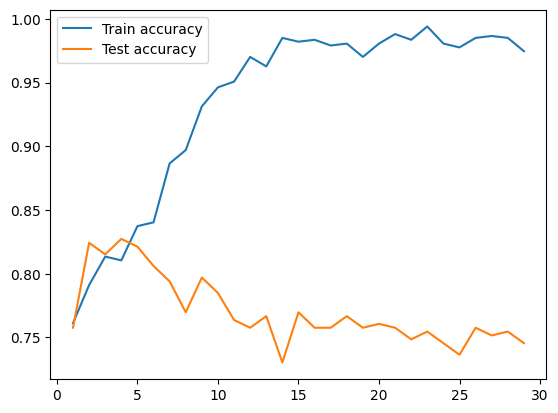

In [16]:
acc_train = []
acc_test = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    clf = RandomForestClassifier(n_estimators=10, max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train, y_pred))
    y_pred = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test, y_pred))

plt.plot(max_depths, acc_train, label="Train accuracy")
plt.plot(max_depths, acc_test, label="Test accuracy")
plt.legend();

## 